# Visualization of PAR heritability estimates
This notebook contains some code for visualizing the heritability estimates from across all models and trait-set variants that we have investigated in the project.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import glob as gb
import csv

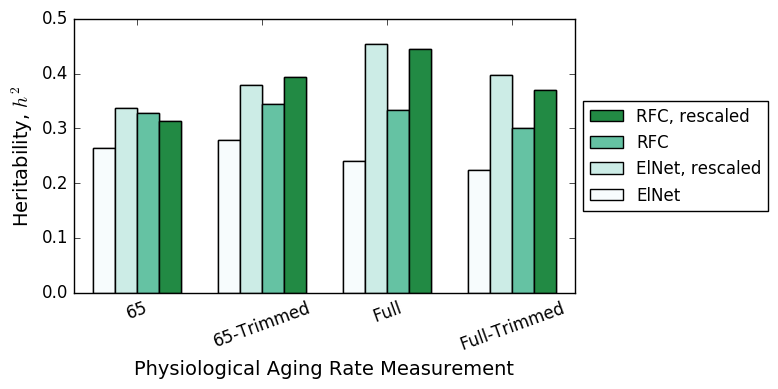

In [4]:
from matplotlib import cm

dpoints = np.array([['Full', 'RFC', 0.328],
           ['Full', 'RFC, rescaled', 0.313],
           ['Full', 'ElNet', 0.265],
           ['Full', 'ElNet, rescaled', 0.337],
           ['Full-Trimmed', 'RFC', 0.345],
           ['Full-Trimmed', 'RFC, rescaled', 0.393],
           ['Full-Trimmed', 'ElNet', 0.278],
           ['Full-Trimmed', 'ElNet, rescaled', 0.380],
           ['65-Trimmed', 'RFC', 0.333],
           ['65-Trimmed', 'RFC, rescaled', 0.445],
           ['65-Trimmed', 'ElNet', 0.241],
           ['65-Trimmed', 'ElNet, rescaled', 0.454],
           ['65', 'RFC', 0.300],
           ['65', 'RFC, rescaled', 0.370],
           ['65', 'ElNet', 0.225],
           ['65', 'ElNet, rescaled', 0.397]])

fig = pl.figure()
ax = fig.add_subplot(111)

space = 0.3

conditions = np.unique(dpoints[:,1])
categories = np.unique(dpoints[:,0])

n = len(conditions)
indeces = np.arange(1,n+1,1)

width = (1 - space) / (len(conditions))

for i,cond in enumerate(conditions):
    vals = dpoints[dpoints[:,1] == cond][:,2].astype(np.float)
    pos = [j - (1 - space) / 2. + i * width for j in range(1,len(categories)+1)]
    ax.bar(pos, vals, width=width)
    
    pl.setp(pl.xticks()[1], rotation=20)

    ax.set_ylabel("Heritability, $h^2$", fontsize=14)
    ax.set_xlabel("Physiological Aging Rate Measurement", fontsize=14)

    ax.bar(pos, vals, width=width, label=cond, 
           color=cm.BuGn(float(i) / n))

ax.set_xticks(indeces)
ax.set_xticklabels(categories)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
pl.tight_layout()
pl.savefig('./Figures/heritability_bar.png', dpi=800, bbox_inches='tight')
pl.show()